## **Markov Decision Porcess**

An **MDP (Markov Decision Process)** provides a formal framework to model decision-making where outcomes are partly random and partly under the control of the decision-maker (agent). MDPs are used to model environments in reinforcement learning, where an agent interacts with the environment to maximize cumulative rewards.

An MDP consists of five key components, often summarized as the "tuple" $(S, A, P, R, \gamma)$:

#### States (S)

The set of all possible states $S$ that the agent can be in. A state gives a complete description of the current situation the agent finds itself in. For example, in a grid world, each square on the grid is a state.

#### Actions (A)

The set of all possible actions $A$ that the agent can take. In each state, the agent can choose from a set of actions to interact with the environment. For example, in a grid world, actions might include moving up, down, left, or right.

#### Transition Probability (P)

The transition probability function $P(s' \mid s, a)$ defines the probability of moving from state $s$ to state $s'$ when the agent takes action $a$. This describes the dynamics of the environment, including any randomness in the outcome of the agent’s actions.

For example, in a grid world, if the agent moves up from a particular state, there’s a chance it may end up in the intended state or another neighboring state due to uncertainty or noise in the environment.

#### Reward Function (R)

The reward function $R(s, a, s')$ specifies the immediate reward the agent receives after transitioning from state $s$ to state $s'$ due to action $a$. This reward can be positive or negative, depending on whether the agent's action leads to a desirable outcome or not.

For example, in a grid world, the agent might receive a reward of $+10$ for reaching a goal state or a penalty of $-1$ for each move.

#### Discount Factor ($\gamma$)

The discount factor $\gamma \in [0,1]$ determines how much the agent values future rewards compared to immediate rewards. A discount factor close to $1$ means the agent is more patient and values future rewards almost as much as immediate ones, while a discount factor close to $0$ means the agent is more short-sighted, focusing on immediate rewards.

The cumulative reward, or **return**, is calculated as:

$$
G_t = R_{t+1} + \gamma R_{t+2} + \gamma^2 R_{t+3} + \dots
$$

### Markov Property

A key characteristic of an MDP is the **Markov Property**, which means that the future state $s_{t+1}$ depends only on the current state $s_t$ and the action $a_t$ taken by the agent, and not on any previous states. In other words, the system is memoryless: the current state captures all relevant information about the past.

Formally:

$$
P(s_{t+1} \mid s_t, a_t, s_{t-1}, a_{t-1}, \dots, s_0, a_0) = P(s_{t+1} \mid s_t, a_t)
$$

#### Objective in MDP

The objective of an agent in an MDP is to find a policy $\pi$ (a strategy that tells the agent which action to take in each state) that maximizes the expected cumulative reward, often called the **return**.

$$
\pi^* = \arg\max_{\pi} \, \mathbb{E}\left[ \sum_{t=0}^\infty \gamma^t R(s_t, a_t) \right]
$$

Here, the goal is to maximize the total rewards over time, balancing immediate and future rewards through the discount factor $\gamma$.

#### Key Concepts

- **Value Function $V(s)$**: The expected return (cumulative future rewards) from being in state $s$ and following a policy $\pi$.

- **Action-Value Function $Q(s, a)$**: The expected return from being in state $s$, taking action $a$, and then following a policy $\pi$.


### Example: Gridworld (MDP)

Let's consider a gridworld environment where an agent can move up, down, left, or right in a grid. The agent starts at a particular location and aims to reach a goal, receiving rewards based on its actions.

#### Environment:

- **States ($S$)**: Represents the possible grid positions.
- **Actions ($A$)**: $A = \{ \text{up}, \text{down}, \text{left}, \text{right} \}$.
- **Transition Probabilities**: The agent moves deterministically in the direction of the chosen action, unless hitting a wall (staying in place).
- **Rewards**: The agent receives a reward of $+1$ for reaching the goal state, $-1$ for falling into a pit, and $0$ otherwise.

In [1]:
import numpy as np

# Define the environment
class GridworldMDP:
    def __init__(self, grid_size, start_state, goal_state, pit_state):
        self.grid_size = grid_size
        self.start_state = start_state
        self.goal_state = goal_state
        self.pit_state = pit_state
        self.actions = ['up', 'down', 'left', 'right']
        self.rewards = np.zeros(grid_size)  # Initialize rewards
        self.rewards[goal_state] = 1  # Reward for reaching the goal
        self.rewards[pit_state] = -1  # Penalty for falling into a pit

    def get_next_state(self, state, action):
        """Returns the next state given the current state and action."""
        row, col = state
        if action == 'up':
            next_state = (max(0, row - 1), col)
        elif action == 'down':
            next_state = (min(self.grid_size[0] - 1, row + 1), col)
        elif action == 'left':
            next_state = (row, max(0, col - 1))
        elif action == 'right':
            next_state = (row, min(self.grid_size[1] - 1, col + 1))
        return next_state

    def get_reward(self, state):
        """Returns the reward for a given state."""
        return self.rewards[state]

# Initialize the Gridworld MDP
grid_size = (4, 4)  # 4x4 grid
start_state = (0, 0)
goal_state = (3, 3)
pit_state = (1, 1)

env = GridworldMDP(grid_size, start_state, goal_state, pit_state)

# Example usage
state = (0, 0)
action = 'down'
next_state = env.get_next_state(state, action)
reward = env.get_reward(next_state)

print(f"Current state: {state}")
print(f"Action: {action}")
print(f"Next state: {next_state}")
print(f"Reward: {reward}")


Current state: (0, 0)
Action: down
Next state: (1, 0)
Reward: 0.0


### **Value Function**

The value function in reinforcement learning measures the long-term goodness of a state. It quantifies how much reward an agent can expect to collect starting from a particular state and following a specific policy. There are two main types of value functions:

#### State Value Function $V_{\pi}(s)$

This represents the expected return (cumulative future rewards) when starting from state $s$ and following a policy $\pi$.

$$
V_{\pi}(s) = \mathbb{E}_{\pi} \left[ \sum_{t=0}^{\infty} \gamma^t R(s_t, a_t) \mid s_0 = s \right]
$$

- $\pi$: The policy the agent is following (a rule mapping states to actions).
- $s_0$: The current state.
- $\gamma$: The discount factor that controls how much the agent values future rewards.
- $R(s_t, a_t)$: The reward at time $t$ after taking action $a_t$ from state $s_t$.

In simpler terms, $V_{\pi}(s)$ tells us the total expected reward an agent will receive starting from state $s$ if it keeps following policy $\pi$.

#### Action Value Function $Q_{\pi}(s, a)$

This represents the expected return starting from state $s$, taking action $a$, and then following policy $\pi$.

$$
Q_{\pi}(s, a) = \mathbb{E}_{\pi} \left[ \sum_{t=0}^{\infty} \gamma^t R(s_t, a_t) \mid s_0 = s, \, a_0 = a \right]
$$

In other words, $Q_{\pi}(s, a)$ tells you how good it is to take action $a$ from state $s$, and then follow policy $\pi$. It’s useful because it evaluates not just states, but the value of state-action pairs.

---

### **Optimal Policy**

The optimal policy $\pi^*$ is the policy that maximizes the expected return for every state. In other words, if the agent follows $\pi^*$, it will always choose actions that maximize its total rewards over time.

The goal in reinforcement learning is to find this optimal policy. To do that, we define two important optimal functions:

#### Optimal State Value Function $V^*(s)$

The optimal state value function represents the maximum expected return the agent can get from state $s$, by following the best possible policy:

$$
V^*(s) = \max_{\pi} V_{\pi}(s)
$$

This is the best possible value the agent can achieve starting from state $s$.

#### Optimal Action Value Function $Q^*(s, a)$

Similarly, the optimal action value function represents the maximum expected return the agent can get by taking action $a$ from state $s$, and then following the optimal policy:

$$
Q^*(s, a) = \max_{\pi} Q_{\pi}(s, a)
$$

This is the best possible value the agent can achieve by taking action $a$ in state $s$ and acting optimally afterward.

---
### **Relationship Between Value Function and Optimal Policy**

Once the agent knows the optimal state value function $V^*(s)$, it can easily determine the optimal policy $\pi^*$ by always choosing actions that maximize the value of future states:

$$
\pi^*(s) = \arg\max_{a} Q^*(s, a)
$$

This means that in each state $s$, the agent picks the action $a$ that gives the highest action value $Q^*(s, a)$. Since $Q^*(s, a)$ tells us how good it is to take action $a$, the agent will always act in a way that maximizes its future rewards.

The **Bellman Optimality Equation** helps express the relationship between optimal values and optimal policies:

- **For the state value function $V^*(s)$**:

  $$
  V^*(s) = \max_{a} \mathbb{E} \left[ R(s, a) + \gamma V^*(s') \mid s, a \right]
  $$

  This equation says that the value of a state under the optimal policy is equal to the immediate reward from taking the best action $a$ plus the discounted value of the next state $s'$.

- **For the action value function $Q^*(s, a)$**:

  $$
  Q^*(s, a) = \mathbb{E} \left[ R(s, a) + \gamma \max_{a'} Q^*(s', a') \mid s, a \right]
  $$

  This says that the optimal value of a state-action pair is the immediate reward for taking action $a$ plus the value of acting optimally from the next state $s'$.

---

### **Finding the Optimal Policy**

There are various algorithms to find the optimal policy and value function:

- **Value Iteration**: Repeatedly updates the value function based on the Bellman Optimality Equation until the values converge.
- **Policy Iteration**: Alternates between policy evaluation (calculating $V_{\pi}(s)$) and policy improvement (making the policy greedier based on the updated values) until the policy converges to $\pi^*$.
- **Q-learning**: A model-free method where the agent learns $Q^*(s, a)$ directly through trial and error, without knowing the environment’s transition probabilities.

#### Example

Consider a grid world where the agent starts at the bottom-left corner and wants to reach a goal at the top-right. The optimal policy $\pi^*$ is the one that takes the agent through the shortest path, while maximizing future rewards (like reaching the goal sooner). The value function $V^*(s)$ for each state would tell the agent the expected reward for being in that state and following the optimal policy.


- The **value function** measures how good it is for the agent to be in a certain state or take a certain action, based on the expected cumulative rewards.
- The **optimal policy** is the strategy that maximizes the agent’s total reward, and it can be derived from the value function by choosing the best actions in every state.
- Algorithms like **value iteration** and **policy iteration** help compute these optimal value functions and policies.

---

***Question***: 

#### **How do you think the value function would change if the rewards were sparse (e.g., large reward only at the goal, and no rewards elsewhere)? Would it be harder or easier for the agent to find the optimal policy?**

- In a sparse reward environment, the value function takes longer to propagate, especially for states far from the goal.
- The optimal policy is harder to learn because the agent receives feedback infrequently.
- Effective exploration is key to discovering the optimal path, and techniques like reward shaping can help mitigate the difficulties.



**Impact of Sparse Rewards on the Value Function**

In environments with sparse rewards, where the agent gets a significant reward only when it reaches a goal (e.g., **+100**), and the rest of the states have no reward (or small penalties), the value function for most states will initially be low or negative.

- **States closer to the goal** will have higher values because the agent can reach the goal in fewer steps, and the large reward propagates back through these states.
- **States further from the goal** will have low or even negative values (if there’s a penalty per step, like **-1**). This happens because the agent will need more steps to reach the goal, and the discount factor $\gamma$ makes future rewards less valuable.
- The sparse reward means the agent will struggle to initially differentiate between good and bad actions, as most actions don’t give immediate feedback. The value function will take longer to propagate and converge.

**Harder to Learn the Optimal Policy**

Learning the optimal policy is harder when rewards are sparse because:

- The agent receives useful feedback (rewards) infrequently, so it has less information to base its decisions on.
- Without immediate rewards, the agent can struggle to know whether its actions are moving it toward the goal or away from it.
- For example, if the agent takes a series of correct steps but doesn't yet reach the goal, it might not realize those steps are part of the optimal path because there's no immediate reward to guide it. It only learns that it was on the right track once it finally reaches the goal and receives the large reward.

**Need for Exploration**

In sparse reward environments, **exploration is critical**. Since immediate rewards don't provide much guidance, the agent must explore more thoroughly to discover the right sequence of actions that leads to the goal.

- Without proper exploration, the agent might never stumble upon the goal, or it might find a suboptimal path and stick to it.
- This is why methods like **epsilon-greedy** are important in such environments. Exploration ensures that the agent eventually reaches the rewarding goal state and can start learning the optimal policy from there.

**Value Propagation Takes Time**

In reinforcement learning, the value function $V(s)$ propagates backward from the goal state. In sparse reward environments, this propagation can be slow because the agent receives the reward only after many steps. As the agent updates its value estimates, it takes time for the reward at the goal to influence states that are far away from the goal.

For example:

- States directly next to the goal will quickly learn that they lead to a large reward, so their value will increase early.
- States far from the goal will take longer to update their values because it takes more steps to propagate the reward back to them.

#### Techniques to Handle Sparse Rewards

- **Reward Shaping**: One way to deal with sparse rewards is to introduce intermediate rewards that guide the agent. For example, giving a small positive reward for getting closer to the goal helps the agent understand that it’s moving in the right direction.

- **Exploration Strategies**: Advanced exploration strategies like **Boltzmann exploration** or **Upper Confidence Bound (UCB)** can help ensure the agent explores more efficiently, improving its chances of finding the goal.


## **Policy**

A **policy** $ \pi $ is essentially a strategy that the agent uses to decide which action to take in any given state. Formally, a policy $ \pi(a | s) $ defines a probability distribution over actions given a state $ s $. The policy tells the agent:

- In state $ s $, what action $ a $ should I take (or how likely I am to take it)?

#### **Why Multiple Policies?**

There are potentially **many policies** because an agent can choose actions in different ways, depending on how it learns and interacts with the environment. Some policies might be:

1. **Random or Exploration-Based**: These policies might explore the environment by randomly selecting actions. Early on, the agent might follow a more exploratory policy to gather information.
   
2. **Greedy or Exploitation-Based**: These policies might focus on choosing the action that maximizes immediate rewards based on current knowledge (exploitation). However, such a policy can sometimes get stuck in **local optima**.

3. **Optimal Policy**: This is the policy that maximizes the **expected return** from every state. The goal of many RL algorithms is to **learn the optimal policy**, often denoted $ \pi^* $.

Each policy $ \pi $ will have its own **value function** $ v_{\pi}(s) $, which tells you the expected cumulative reward when following that particular policy starting from state $ s $.

#### Example:

- One policy might say: "In state $ s_1 $, take action $ a_1 $ with 90% probability and action $ a_2 $ with 10% probability."
- Another policy might say: "In state $ s_1 $, always take action $ a_2 $."

These two policies will result in different trajectories through the environment, potentially leading to different rewards.

---

#### **Can we think of a situation in which having multiple policies could be useful for an agent? How might exploring different policies help the agent discover better strategies over time?**

---
*Reasons*:

**Exploration vs. Exploitation**

At the beginning of the learning process, the agent may not have enough information about the environment to know which actions lead to better outcomes. Having multiple policies allows the agent to explore different strategies. For example:

- An **exploration-focused policy** helps the agent try new actions and discover regions of the state space it hasn’t visited.
- An **exploitation-focused policy** helps the agent make decisions based on current knowledge, aiming to maximize immediate rewards.

By exploring different policies, the agent can strike a balance between exploring unknown parts of the environment and exploiting what it already knows to get rewards.

**Finding the Optimal Policy**

In reinforcement learning, the ultimate goal is often to find the optimal policy $ \pi^* $, which maximizes the expected return for the agent in every state. However, the agent might not start with the optimal policy right away. It needs to evaluate and improve its policy over time. Having multiple policies helps the agent:

- Start with a basic policy (perhaps random or heuristic-based).
- Improve the policy iteratively by evaluating it (using policy evaluation) and then updating it (using policy improvement or other algorithms like policy iteration or Q-learning).

The agent will go through many policies before converging to $ \pi^* $, the optimal policy.

**Dealing with Non-Stationary Environments**

In a non-stationary environment (where the rules, rewards, or dynamics change over time), sticking to a single policy might not be effective in the long run. By experimenting with multiple policies, the agent can adapt to changes in the environment. For instance:

- Early on, the agent might favor exploration to discover how the environment works.
- Later, as the environment stabilizes, the agent can switch to more exploitation-focused policies.

**Policy Improvement**

When we evaluate a policy (using policy evaluation) and understand how well it performs, we often want to improve upon it. The process of policy iteration involves evaluating one policy and then generating a better policy based on the results:

- The agent might first evaluate a **greedy policy**, which chooses the best immediate action.
- Later, the agent might evaluate a **soft policy**, which still explores suboptimal actions occasionally to ensure it’s not missing a better long-term strategy.

By iterating over multiple policies, the agent can continuously refine its strategy until it converges on the optimal one.

Exploring multiple policies is crucial to reinforcement learning because it helps the agent learn about the environment, adapt to changes, and improve its decision-making process.


### **Generalized Policy Iteration (GPI)**

It is a powerful concept in reinforcement learning that refers to the overall process of simultaneously evaluating and improving policies. It’s a high-level framework that encompasses many specific algorithms, such as policy iteration and value iteration.

GPI breaks the process of finding an optimal policy into two main, alternating steps:
1. **Policy Evaluation**  computes the value function for a fixed policy, estimating how good it is to follow that policy.
2. **Policy Improvement** refines the policy by making it greedy, choosing the best actions based on the current value estimates.
3. **Policy Iteration** alternates between evaluation and improvement, progressively improving the policy until it becomes optimal. The combination of these two processes converges to the optimal policy and the optimal value function.




### 1. Policy Evaluation

Policy evaluation is the process of determining how good a given policy $ \pi $ is by calculating the value function $ V_{\pi}(s) $ for each state $ s $. The value function represents the expected return (sum of future rewards) starting from state $ s $ and following the policy $ \pi $.

#### Purpose

- The goal of policy evaluation is to compute the value function under a fixed policy, which tells you the long-term utility (expected return) of starting from any state $ s $ and following the current policy $ \pi $.

**Mathematical Definition**

For a given policy $ \pi $, the state-value function $ V_{\pi}(s) $ is given by:

$$
V_{\pi}(s) = \mathbb{E}_{\pi} \left[ \sum_{t=0}^{\infty} \gamma^t R_{t+1} \mid S_0 = s \right]
$$

Where:

- $ R_{t+1} $ is the reward received at time $ t+1 $.
- $ \gamma $ is the discount factor (to account for the preference of immediate rewards over future rewards).
- $ \mathbb{E}_{\pi} $ denotes the expected value, assuming the agent follows policy $ \pi $.

In practice, the Bellman expectation equation for policy evaluation is:

$$
V_{\pi}(s) = \sum_a \pi(a \mid s) \sum_{s'} P(s' \mid s, a) \left[ R(s, a, s') + \gamma V_{\pi}(s') \right]
$$

This equation states that the value of a state $ s $ under policy $ \pi $ is the expected reward plus the discounted value of the next state, weighted by the probabilities of the actions taken under policy $ \pi $.

**Example**

In a gridworld environment, policy evaluation tells you the expected long-term reward for each grid cell (state) under the current policy. If the agent is taking random actions, the value for each cell will reflect how close or far it is from the goal, with penalties for bad actions (like falling into a pit).

---

### 2. Policy Improvement

Policy improvement is the process of using the value function $ V_{\pi}(s) $ from policy evaluation to find a better policy. Given the value of each state, policy improvement chooses actions that maximize the expected return at each state.

#### Purpose

- The goal of policy improvement is to update the current policy $ \pi $ to a new and improved policy $ \pi' $ that is better in terms of expected returns. This is done by choosing actions that maximize the value function.

#### Greedy Policy Improvement

The updated policy $ \pi' $ is created by selecting actions that maximize the value of future states. This is called a greedy policy with respect to the current value function:

$$
\pi'(s) = \arg\max_{a} \sum_{s'} P(s' \mid s, a) \left[ R(s, a, s') + \gamma V_{\pi}(s') \right]
$$

This means that for each state $ s $, the new policy $ \pi'(s) $ selects the action $ a $ that yields the highest expected value (considering both immediate reward and the future value of the next state).

**Example**

In a gridworld, if the current value function suggests that moving right will bring the agent closer to the goal faster, the improved policy will choose to move right in that state. This makes the agent's behavior more optimal.

---

### 3. Policy Iteration

Policy iteration is the iterative process of alternating between policy evaluation and policy improvement. The algorithm starts with an initial policy (often random) and repeatedly evaluates and improves the policy until it converges to an optimal policy $ \pi^* $.

#### Steps of Policy Iteration

1. **Policy Evaluation**: Given a policy $ \pi $, compute the value function $ V_{\pi}(s) $ for all states.
2. **Policy Improvement**: Improve the policy $ \pi $ by making it greedy with respect to the value function $ V_{\pi}(s) $, creating a new policy $ \pi' $.
3. **Repeat**: Iterate the policy evaluation and improvement steps until the policy no longer changes, meaning it has converged to the optimal policy $ \pi^* $.

---
#### Convergence

Policy iteration is guaranteed to converge to the optimal policy $ \pi^* $, where no further improvements can be made, and the value function reaches its optimal state $ V^*(s) $.

**Example**

- In the context of a gridworld, policy iteration starts with a random policy where the agent explores different directions.
- After each evaluation-improvement cycle, the agent becomes better at choosing the optimal path toward the goal while avoiding penalties.
- After several iterations, the agent learns the optimal policy that minimizes the number of steps to the goal and avoids the pit.

---
This combination of evaluation and improvement is the foundation of many reinforcement learning algorithms, helping the agent learn to maximize rewards over time.



**UpdatedGridMDP environement.**

In [2]:
import numpy as np
from typing import Tuple

class UpdatedGridMDP:
    def __init__(self, grid_size: Tuple[int, int], goal_state: Tuple[int, int], pit_state: Tuple[int, int], gamma: float = 0.9):
        """
        Initializes the Gridworld MDP environment.

        Args:
        - grid_size (Tuple[int, int]): Size of the grid (rows, columns).
        - goal_state (Tuple[int, int]): The state where the agent receives a positive reward.
        - pit_state (Tuple[int, int]): The state where the agent receives a negative reward.
        - gamma (float): The discount factor, controlling how future rewards are weighted.
        """
        self.grid_size: Tuple[int, int] = grid_size
        self.goal_state: Tuple[int, int] = goal_state
        self.pit_state: Tuple[int, int] = pit_state
        self.actions: list[str] = ['up', 'down', 'left', 'right']  # Define the possible actions
        self.gamma: float = gamma
        
        # Define the rewards. Each step costs -0.1, except for the goal (+1) and pit (-1).
        # Penalty for each move to encourage reaching the goal faster
        self.rewards: np.ndarray = np.full(grid_size, -0.1)  
        # Reward for reaching the goal
        self.rewards[goal_state] = 1  
        # Penalty for falling into a pit
        self.rewards[pit_state] = -1  

        # Initialize a random policy with equal probability for all actions (uniform policy)
        self.policy: np.ndarray = np.ones((grid_size[0], grid_size[1], len(self.actions))) / len(self.actions)
        
    def get_next_state(self, state: Tuple[int, int], action: str)-> Tuple[int, int]:
        row, col = state
        
        if action == "up": return (max(0, row-1), col)
        elif action == "down": return (min(self.grid_size[0] -1, row+1), col)
        elif action == "right": return (row, min(self.grid_size[1]-1, col +1))
        elif action == "left": return (row, max(0, col - 1))
        
    def get_reward(self, state:Tuple[int, int])->float:
        return self.rewards[state]
    
    def is_terminal(self, state: Tuple[int, int])->bool:
        return state == self.goal_state or state == pit_state


**Policy Iteration [Policy evaluation | Policy Improvement]**

In [3]:
from utils import *
def policy_iteration(env:UpdatedGridMDP, theta=0.01, save_gif:str = None):
    # Initialize value function (V) to zeros for all states in the grid
    V = np.zeros(env.grid_size)

    # Define policy evaluation step
    def policy_evaluation(policy, V, save_gif=None):
        """
        Evaluate the current policy by iteratively updating the value function V 
        until it converges within a small threshold theta.
        """
        iteration = 0
        while True:
            delta = 0  # Track the maximum change in the value function
            for row in range(env.grid_size[0]):  # Loop over all rows (states)
                for col in range(env.grid_size[1]):  # Loop over all columns (states)
                    state = (row, col)  # Define the current state as a tuple
                    if env.is_terminal(state): continue  # Skip terminal states

                    v = V[state]  # Store the current value of the state
                    new_v = 0  # Initialize new value for the state
                    # Loop over all possible actions in the policy
                    for i, action in enumerate(env.actions):
                        next_state = env.get_next_state(state, action)  # Get the next state after taking action
                        # Update new value using the Bellman equation: 
                        # Expected reward + discounted future value of next state
                        new_v += policy[row, col, i] * (env.get_reward(next_state) + env.gamma * V[next_state])

                    V[state] = new_v  # Update the value function with the new value
                    delta = max(delta, abs(v - V[state]))  # Track the maximum change in value for this iteration
            if save_gif: save_value_function_as_image(V, iteration, title=f"{save_gif}", policy=env.policy)
            iteration += 1
            # If the change in value function (delta) is less than the threshold, stop evaluating
            if delta < theta: break
             
        return V  # Return the updated value function

    # Define policy improvement step
    def policy_improvement(V):
        """
        Improve the policy by acting greedily based on the current value function V.
        """
        new_policy = np.zeros_like(env.policy)  # Create a new policy with the same shape as the current one
        policy_stable = True  # Assume the policy is stable unless proven otherwise

        for row in range(env.grid_size[0]):  # Loop over all rows (states)
            for col in range(env.grid_size[1]):  # Loop over all columns (states)
                state = (row, col)  # Define the current state
                if env.is_terminal(state): continue  # Skip terminal states

                action_values = []  # Store the values of each action
                # Loop over all possible actions to calculate action values
                for action in env.actions:
                    next_state = env.get_next_state(state, action)  # Get the next state for each action
                    # Compute the value of taking the action: reward + discounted future value
                    action_values.append(env.get_reward(next_state) + env.gamma * V[next_state])

                # Find the action that maximizes the value (greedy improvement)
                best_action = np.argmax(action_values)
                new_policy[row, col, :] = 0  # Reset the policy for this state
                new_policy[row, col, best_action] = 1  # Set the best action for the current state

                # Check if the new policy differs from the current policy
                if not np.array_equal(new_policy[row, col], env.policy[row, col]):
                    policy_stable = False  # If different, the policy is not yet stable

        return new_policy, policy_stable  # Return the new policy and whether it's stable

    policy_stable = False  # Initially, assume the policy is not stable
    policy_name = "random_policy"
    iter = 0
    # Policy iteration loop: continue until the policy is stable
    while not policy_stable:
        # Step 1: Policy Evaluation - Evaluate the current policy to get the updated value function
        V = policy_evaluation(env.policy, V, save_gif=f"{save_gif}_{policy_name}")
        create_gif_from_images(f"policy_iteration_{policy_name}_{iter}")
        iter += 1
        policy_name = f"greedy_policy_iter_{iter}"
        # Step 2: Policy Improvement - Improve the policy based on the updated value function
        env.policy, policy_stable = policy_improvement(V)

    return V, env.policy  # Return the final value function and the optimal policy


GIF saved as amimated/policy_iteration_random_policy_0.gif and images have been deleted.
GIF saved as amimated/policy_iteration_greedy_policy_iter_1_1.gif and images have been deleted.
GIF saved as amimated/policy_iteration_greedy_policy_iter_2_2.gif and images have been deleted.
Policy:
[[[0. 1. 0. 0.]
  [0. 0. 0. 1.]
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]]

 [[0. 1. 0. 0.]
  [0. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]]

 [[0. 1. 0. 0.]
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]]

 [[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 0.]]]



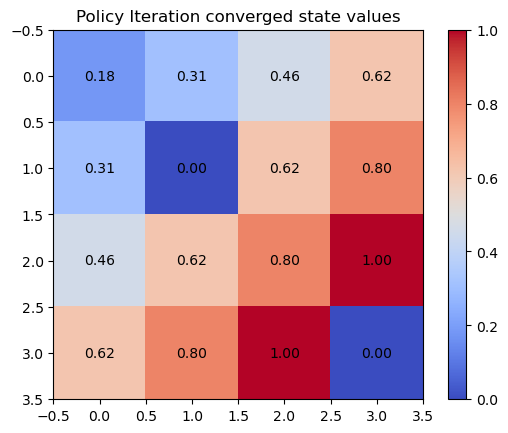

In [4]:
# Create an MDP instance
grid_size = (4, 4)
goal_state = (3, 3)
pit_state = (1, 1)
env = UpdatedGridMDP(grid_size, goal_state, pit_state)

V_policy_iter, policy_policy_iter = policy_iteration(env, save_gif="Policy Iteration")

print(f"Policy:\n{policy_policy_iter}\n")
visualize_values(V_policy_iter, "Policy Iteration converged state values")

In [5]:
from config import Config
import os

# getting all gif files 
policy_files = []    
if not os.path.exists(Config.gif_dir):
    print(f"Directory {Config.gif_dir} does not exist.")
else:
    # Proceed with listing files
    for filename in os.listdir(Config.gif_dir):
        if filename.startswith("policy_iteration"):
            policy_files.append(os.path.join(Config.gif_dir, filename))


policy_files = sorted(policy_files)
policy_files.insert(0, policy_files.pop())
display_images_in_grid(policy_files)

The results of this policy iteration process reveal important insights into the effectiveness of different policies, especially with the stopping criterion of 0.01, where the iteration stops if the value function does not change by more than 0.01.

In the first image, which corresponds to **Greedy Policy Iteration after Iteration 1, Sweep 6**, the policy has reached a stable state. After several sweeps, the value function has converged, and the arrows in the grid indicate the optimal actions the agent takes from each state. The policy consistently directs the agent to move downward toward the goal, as shown by the arrows. The value function in this plot clearly improves as the agent moves closer to the goal state in the bottom-right corner, where the value reaches `(1.00)`. This demonstrates that the policy is successfully guiding the agent toward the highest rewards. With the values changing very little across the grid, this iteration has likely reached near-optimality, and further sweeps would not result in significant changes in the policy or value function.

In the second image, representing **Greedy Policy Iteration after Iteration 2, Sweep 0**, the values have remained largely unchanged compared to Iteration 1. This indicates that the policy has reached a near-optimal state, and further iterations do not significantly improve the value function. The arrows remain consistent with the previous sweep, reflecting the stability of the policy. The fact that the value function is stable across both sweeps suggests that the stopping criterion has been met, meaning the policy has converged, and no further improvements can be made within the threshold of 0.01.

The third image, which shows the results for a **Random Policy after Sweep 12**, illustrates the stark contrast between structured policies and random actions. In this case, the value function remains negative across the grid, reflecting poor performance. The arrows are random, and the agent is not able to efficiently move toward the goal, leading to lower rewards and negative values throughout. Even after multiple sweeps, the random policy fails to improve, emphasizing the inefficiency of random actions in a goal-directed environment like this one.

Based on these results, the **greedy policy iteration** has successfully converged to a near-optimal policy, where the agent consistently selects actions that lead to the highest rewards. Given the stopping criterion of `0.01`, it is clear that further iterations would not yield significant changes. This convergence suggests that the policy iteration method has effectively found a solution, and further sweeps are unnecessary. In contrast, the **random policy** demonstrates poor performance, highlighting the need for more structured exploration and action selection strategies. You might consider testing other exploration strategies, such as epsilon-greedy or Boltzmann exploration, to improve the agent's behavior in non-greedy contexts.

The greedy policy has shown clear improvements and stability, allowing the iteration to stop early due to the convergence of the value function. The random policy, on the other hand, remains ineffective, further underscoring the importance of guided policy improvements in reinforcement learning environments. Lets further testing, comparing these results with methods like **value iteration** or **Q-learning** could offer additional insights into how different algorithms handle similar environments.

### 3. Value Iteration

Value Iteration is an algorithm used to compute the optimal value function and, from that, derive the optimal policy for an agent in a Markov Decision Process (MDP). The central idea is to iteratively update the value of each state until the value function converges to the optimal value function $V^*(s)$. Once the optimal value function is found, the optimal policy can be easily extracted by selecting the action that maximizes the expected return for each state.

---
**How Value Iteration Works**

The algorithm is based on the **Bellman Optimality Equation**, which is a recursive relationship that expresses the value of a state as the maximum expected return from taking the best possible action from that state. The Bellman equation for the optimal value function $V^*(s)$ is:

$$
V^*(s) = \max_{a} \sum_{s'} P(s' \mid s, a) \left[ R(s, a, s') + \gamma V^*(s') \right]
$$

Where:

- $s$ is the current state.
- $a$ is an action the agent can take.
- $s'$ is the next state the agent transitions to.
- $P(s' \mid s, a)$ is the probability of reaching state $s'$ from state $s$ after taking action $a$.
- $R(s, a, s')$ is the reward received after transitioning to $s'$.
- $\gamma$ is the discount factor (controls the weighting of future rewards).

---
**Steps of Value Iteration**

1. **Initialize the Value Function**:
   Start by initializing the value function $V(s)$ arbitrarily for all states, usually setting $V(s) = 0$ for all states.

2. **Bellman Update**:
   For each state $s$, update the value function $V(s)$ using the Bellman Optimality Equation. This step looks ahead at the possible future states $s'$ for each action $a$, and updates the value of the current state based on the expected future rewards.

3. **Repeat Until Convergence**:
   Continue updating the value function for all states until the values converge. This means that the value of each state changes by less than a small threshold (e.g., $\theta = 0.01$) between iterations.

4. **Extract the Optimal Policy**:
   Once the value function has converged to the optimal value function $V^*(s)$, the optimal policy $\pi^*(s)$ can be derived by choosing the action that maximizes the expected return for each state:

   $$
   \pi^*(s) = \arg\max_{a} \sum_{s'} P(s' \mid s, a) \left[ R(s, a, s') + \gamma V^*(s') \right]
   $$

The optimal policy essentially tells the agent which action to take in each state to maximize long-term rewards.

--- 

Lets continue the same GridMDP example using value iteration.

In [6]:
# Value Iteration Algorithm
def value_iteration(env:UpdatedGridMDP, theta=0.01, save_gif= None):
    """
    Perform value iteration to compute the optimal value function and derive the optimal policy.

    Args:
    - env: The env environment, which includes the grid size, actions, reward function, and transition dynamics.
    - theta: The stopping criterion. Value iteration stops when the change in the value function is less than theta.

    Returns:
    - V: The optimal value function.
    - optimal_policy: The optimal policy derived from the optimal value function.
    """
    
    # Step 1: Initialize the value function (V) for all states to 0.
    V = np.zeros(env.grid_size)  # Grid of value estimates for each state
    iterations = 0
    while True:
        delta = 0  # Track the maximum change in value for any state
        
        # Step 2: Update the value function for all states
        for row in range(env.grid_size[0]):  # Iterate through all rows (states)
            for col in range(env.grid_size[1]):  # Iterate through all columns (states)
                state = (row, col)  # Current state
                
                # Skip terminal states as they do not have future actions
                if env.is_terminal(state): 
                    continue
                
                # Step 2.1: Calculate the value of each action
                action_values = []  # Store the expected values of taking each action
                for action in env.actions:
                    next_state = env.get_next_state(state, action)  # Get the resulting next state
                    reward = env.get_reward(next_state)  # Get the reward for transitioning to next state
                    # Bellman update: reward + discounted value of the next state
                    action_values.append(reward + env.gamma * V[next_state])
                
                # Step 2.2: Update the value of the current state
                v = V[state]  # Store the current value of the state
                V[state] = max(action_values)  # Update the value to the max value from all actions
                delta = max(delta, abs(v - V[state]))  # Update delta to track the largest change
        
        if save_gif: save_value_function_as_image(V, iterations, title=save_gif)
        iterations += 1
        # Step 3: Check if the values have converged (i.e., if the change in values is less than theta)
        if delta < theta:
            break  # Stop the loop when values converge (no significant changes)
    if save_gif: create_gif_from_images(save_gif)
    # Step 4: Derive the optimal policy from the optimal value function
    
    policy_iteration = 0
    optimal_policy = np.zeros_like(env.policy)  # Initialize an empty policy
    
    for row in range(env.grid_size[0]):  # Iterate through all rows (states)
        for col in range(env.grid_size[1]):  # Iterate through all columns (states)
            state = (row, col)  # Current state
            
            # Skip terminal states as no actions need to be taken there
            if env.is_terminal(state): 
                continue
            
            # Step 4.1: Calculate the value of each action again to derive the best action
            action_values = []
            for action in env.actions:
                next_state = env.get_next_state(state, action)  # Get the next state for the action
                reward = env.get_reward(next_state)  # Get the reward for transitioning
                # Bellman equation: reward + discounted value of next state
                action_values.append(reward + env.gamma * V[next_state])
            
            # Step 4.2: Find the action that maximizes the expected return
            best_action = np.argmax(action_values)  # Index of the best action
            optimal_policy[row, col, :] = 0  # Reset policy at the current state
            optimal_policy[row, col, best_action] = 1  # Set the best action for the current state
        if save_gif: save_value_function_as_image(V, iterations, title=f"{save_gif}_finding_policy_at", policy=optimal_policy)
        policy_iteration += 1
    if save_gif: create_gif_from_images("value_iteration_optimal_policy")
    return V, optimal_policy  # Return the optimal value function and the derived optimal policy


GIF saved as amimated/Value Iteration.gif and images have been deleted.
GIF saved as amimated/value_iteration_optimal_policy.gif and images have been deleted.
Policy:
[[0.18098 0.3122  0.458   0.62   ]
 [0.3122  0.      0.62    0.8    ]
 [0.458   0.62    0.8     1.     ]
 [0.62    0.8     1.      0.     ]]



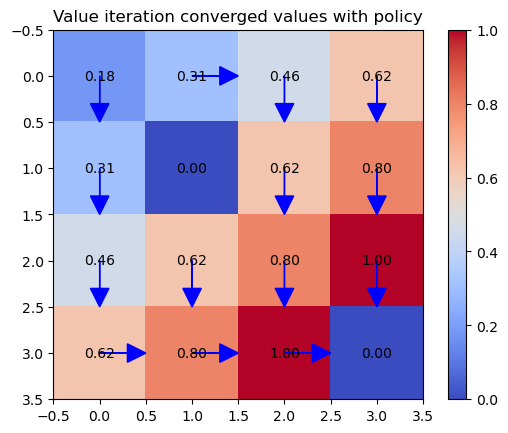

In [7]:
# Create an MDP instance
grid_size = (4, 4)
goal_state = (3, 3)
pit_state = (1, 1)
env = UpdatedGridMDP(grid_size, goal_state, pit_state)

V_value_iter, policy_value_iter = value_iteration(env, theta=0.01, save_gif="Value Iteration")

print(f"Policy:\n{V_value_iter}\n")
visualize_values(V_value_iter, "Value iteration converged values with policy", policy_value_iter)

The image shows the final value function and optimal policy after value iteration. The numbers in each cell represent the expected cumulative reward from that state, with higher values near the goal (bottom-right). The blue arrows indicate the optimal actions, guiding the agent down and to the right toward the goal. The value function and policy are well-aligned, showing that the agent is following a strategy to maximize rewards. This indicates successful convergence of the value iteration algorithm.

### Value Iteration vs. Policy Iteration

While both Value Iteration and Policy Iteration are used to solve MDPs, there are some key differences:

| **Feature**                            | **Value Iteration**                                                                                                                                   | **Policy Iteration**                                                                                                                                               |
|----------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Policy Evaluation and Improvement**  | Combines policy evaluation and policy improvement in a single step.                                                                                    | Alternates between two steps: policy evaluation and policy improvement.                                                                                            |
| **Update Method**                      | Directly updates the value function by looking ahead and choosing the best action at each step.                                                        | Evaluates a fixed policy to compute its value function, then improves the policy based on the current value function.                                              |
| **Number of Iterations**               | May require more iterations to converge because it updates values incrementally.                                                                       | Typically takes fewer overall iterations because it computes the exact value function during policy evaluation.                                                    |
| **Computation per Iteration**          | Less computation per iteration since it combines steps and updates values based on immediate lookahead.                                                | More computation per iteration due to the potentially costly policy evaluation step, which may involve solving a system of equations for all states.               |
| **Convergence**                        | Often converges slowly due to smaller updates in each iteration but requires less computational effort per iteration.                                  | Often converges faster in terms of the number of iterations but each iteration is computationally heavier due to thorough policy evaluation.                       |
| **Practical Usage**                    | Preferred when the state space is large, and exact policy evaluation is computationally infeasible or too costly.                                      | Useful when precise policy evaluation is feasible, and the number of states is manageable, allowing for exact computation of the value function in each iteration. |
| **Policy Stability**                   | The policy is implicitly improved in each iteration but is not explicitly represented until convergence.                                               | The policy is explicitly updated after each policy improvement step, providing a clear policy at each iteration.                                                   |
| **Implementation Complexity**          | Generally simpler to implement since it doesn't require separate evaluation and improvement steps.                                                     | More complex due to alternating between policy evaluation and improvement, and possibly solving systems of equations during evaluation.                            |
